<a href="https://colab.research.google.com/github/durvaakadam/Handwritten-Equation-Solver/blob/master/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0–1 range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Testing set shape: (10000, 28, 28, 1)


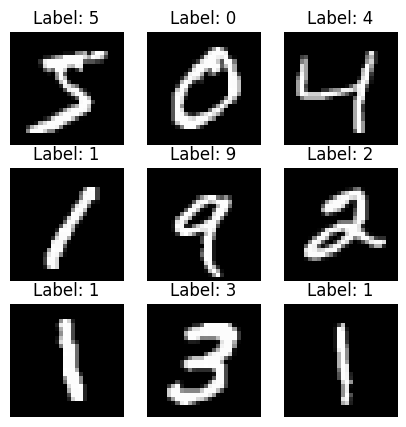

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 digits (0–9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=8,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.8385 - loss: 0.5049 - val_accuracy: 0.9830 - val_loss: 0.0520
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9718 - loss: 0.0950 - val_accuracy: 0.9868 - val_loss: 0.0381
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9799 - loss: 0.0676 - val_accuracy: 0.9886 - val_loss: 0.0345
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9834 - loss: 0.0564 - val_accuracy: 0.9899 - val_loss: 0.0267
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9858 - loss: 0.0471 - val_accuracy: 0.9915 - val_loss: 0.0269
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9885 - loss: 0.0357 - val_accuracy: 0.9920 - val_loss: 0.0242
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9907 - loss: 0.0309 - val_accuracy: 0.9914 - val_loss: 0.0268
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)


313/313 - 3s - 9ms/step - accuracy: 0.9932 - loss: 0.0241
Test accuracy: 0.9932000041007996


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


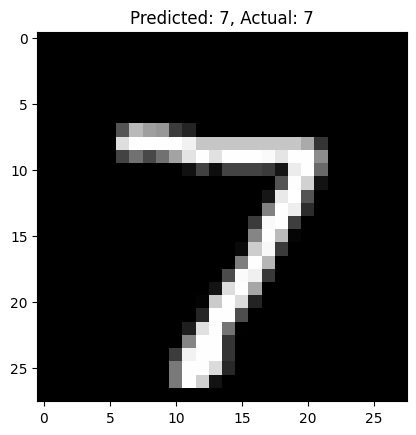

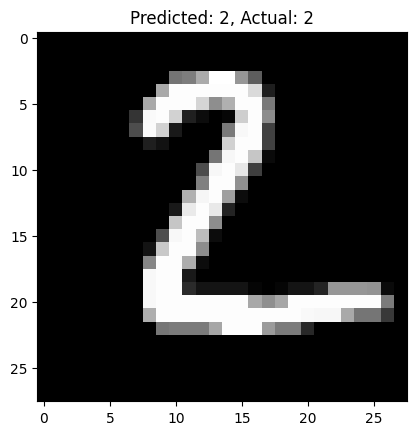

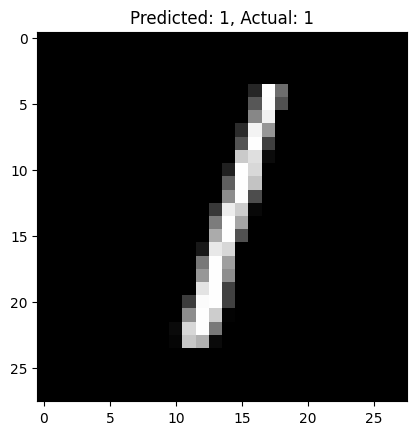

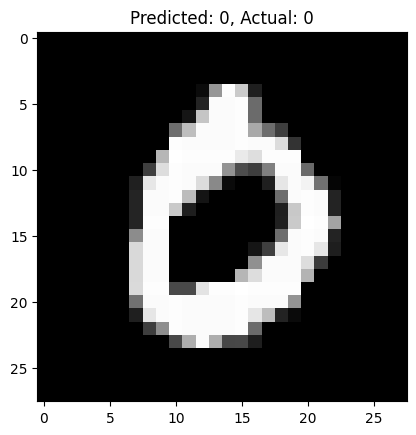

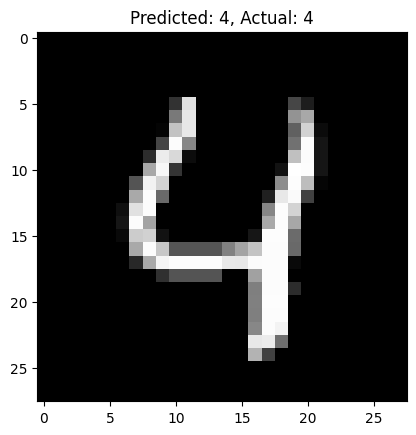

In [ ]:
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.show()


In [ ]:
model.save("mnist_cnn.h5")
from google.colab import files
files.download("mnist_cnn.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose your 5.jpg


Saving 5.jpg to 5.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select your mnist_cnn.keras or mnist_cnn.h5 file


Saving mnist_cnn.h5 to mnist_cnn.h5


In [ ]:
from tensorflow import keras

# Replace "mnist_cnn.keras" with the exact uploaded filename
model = keras.models.load_model("mnist_cnn.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Predicted digit: 2


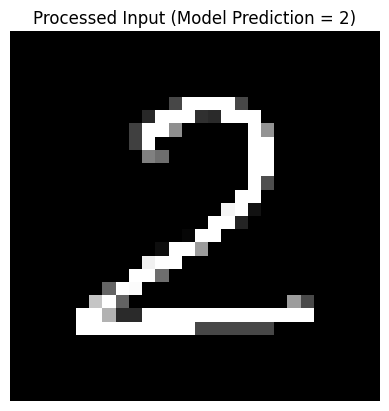

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 1. Load your trained model
model = keras.models.load_model("mnist_cnn.h5")  # change to .h5 if you saved in h5 format

# 2. Load input image (replace with your filename e.g. "5.jpg")
img = cv2.imread("2.jpg")

# 3. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4. Denoise slightly (optional, helps with shadows/noise)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 5. Threshold → Invert (to make digit white on black, like MNIST)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# 6. Find and crop the largest contour (the digit)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    digit = thresh[y:y+h, x:x+w]
else:
    digit = thresh

# 7. Resize while keeping aspect ratio
digit = cv2.resize(digit, (18,18))  # shrink digit
padded = np.pad(digit, ((5,5),(5,5)), "constant", constant_values=0)

# 8. Normalize & reshape for model
final = padded.astype("float32") / 255.0
final = final.reshape(1,28,28,1)

# 9. Predict
prediction = model.predict(final)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)

# 10. Show the processed image
plt.imshow(padded, cmap="gray")
plt.title(f"Processed Input (Model Prediction = {predicted_digit})")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted digit: 3


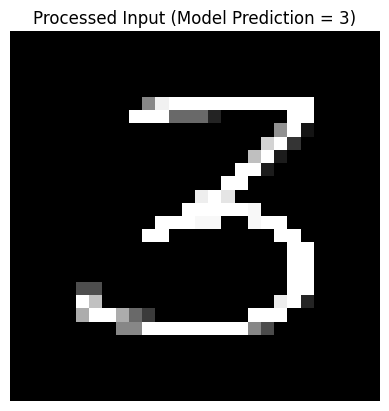

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 1. Load your trained model
model = keras.models.load_model("mnist_cnn.h5")  # change to .h5 if you saved in h5 format

# 2. Load input image (replace with your filename e.g. "5.jpg")
img = cv2.imread("3.jpg")

# 3. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4. Denoise slightly (optional, helps with shadows/noise)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 5. Threshold → Invert (to make digit white on black, like MNIST)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# 6. Find and crop the largest contour (the digit)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    digit = thresh[y:y+h, x:x+w]
else:
    digit = thresh

# 7. Resize while keeping aspect ratio
digit = cv2.resize(digit, (18,18))  # shrink digit
padded = np.pad(digit, ((5,5),(5,5)), "constant", constant_values=0)

# 8. Normalize & reshape for model
final = padded.astype("float32") / 255.0
final = final.reshape(1,28,28,1)

# 9. Predict
prediction = model.predict(final)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)

# 10. Show the processed image
plt.imshow(padded, cmap="gray")
plt.title(f"Processed Input (Model Prediction = {predicted_digit})")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted digit: 5


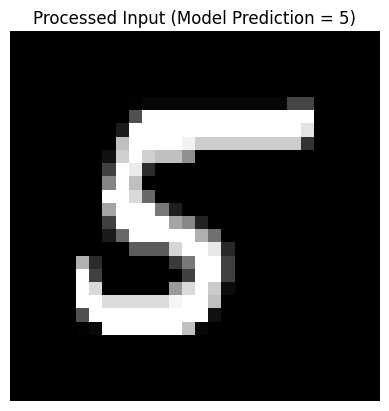

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 1. Load your trained model
model = keras.models.load_model("mnist_cnn.h5")  # change to .h5 if you saved in h5 format

# 2. Load input image (replace with your filename e.g. "5.jpg")
img = cv2.imread("5.jpg")

# 3. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 4. Denoise slightly (optional, helps with shadows/noise)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 5. Threshold → Invert (to make digit white on black, like MNIST)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# 6. Find and crop the largest contour (the digit)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    x,y,w,h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    digit = thresh[y:y+h, x:x+w]
else:
    digit = thresh

# 7. Resize while keeping aspect ratio
digit = cv2.resize(digit, (18,18))  # shrink digit
padded = np.pad(digit, ((5,5),(5,5)), "constant", constant_values=0)

# 8. Normalize & reshape for model
final = padded.astype("float32") / 255.0
final = final.reshape(1,28,28,1)

# 9. Predict
prediction = model.predict(final)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)

# 10. Show the processed image
plt.imshow(padded, cmap="gray")
plt.title(f"Processed Input (Model Prediction = {predicted_digit})")
plt.axis("off")
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


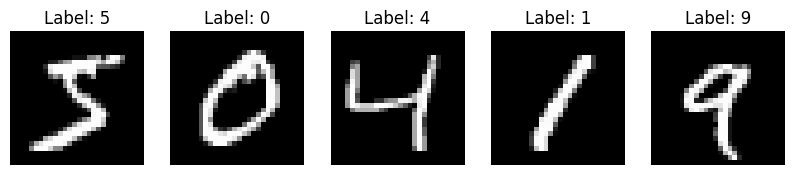

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST again (just to be safe)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show first 5 images from training set
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)  # 1 row, 5 columns
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()
